## Phone Price Prediction

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import re

#### Import Dataset

In [4]:
phones_df = pd.read_csv("processed_data news.csv")
phones_df.head(3)

,phone_brand,phone_model,store,price,currency,price_USD,storage,ram,Launch,Dimensions,...,Chipset,CPU,GPU,Year,Foldable,PPI_Density,quantile_10,quantile_50,quantile_90,price_range
0,apple,Apple iPhone X,Amazon DE,213.85,EUR,231.73,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),...,Apple A11 Bionic (10 nm),Hexa-core 2.39 GHz (2x Monsoon + 4x Mistral),Apple GPU (three-core graphics),2017,0,458,16.978.300.000.000.000,197.315,22.484.699.999.999.900,high price
1,apple,Apple iPhone X,Amazon US,162.90,USD,162.90,256,3,2017-11-03,143.6 x 70.9 x 7.7 mm (5.65 x 2.79 x 0.30 in),...,Apple A11 Bionic (10 nm),Hexa-core 2.39 GHz (2x Monsoon + 4x Mistral),Apple GPU (three-core graphics),2017,0,458,16.978.300.000.000.000,197.315,22.484.699.999.999.900,low price
2,samsung,Samsung Galaxy S9+,Amazon DE,117.84,EUR,127.69,64,6,2018-03-01,158.1 x 73.8 x 8.5 mm (6.22 x 2.91 x 0.33 in),...,Exynos 9810 (10 nm) - EMEA,Octa-core (4x2.7 GHz Mongoose M3 & 4x1.8 GHz C...,Mali-G72 MP18 - EMEA,2018,0,529,14.129.600.000.000.000,214.560,311.688,low price


#### Shape

In [5]:
phones_df.shape

(1715, 31)

#### Categorical Columns

In [6]:
phones_df.select_dtypes(include='object').columns

Index(['phone_brand', 'phone_model', 'store', 'currency', 'Launch',
       'Dimensions', 'Display_Type', 'Display_Resolution', 'OS', 'USB',
       'Features_Sensors', 'Colors', 'Video', 'Chipset', 'CPU', 'GPU',
       'quantile_10', 'quantile_90', 'price_range'],
      dtype='object')

#### Numerical Columns

In [7]:
phones_df.select_dtypes(include='number').columns

Index(['price', 'price_USD', 'storage', 'ram', 'Weight', 'Display_Size', 'NFC',
       'BATTERY', 'Year', 'Foldable', 'PPI_Density', 'quantile_50'],
      dtype='object')

#### Columns

In [8]:
phones_df.columns

Index(['phone_brand', 'phone_model', 'store', 'price', 'currency', 'price_USD',
       'storage', 'ram', 'Launch', 'Dimensions', 'Weight', 'Display_Type',
       'Display_Size', 'Display_Resolution', 'OS', 'NFC', 'USB', 'BATTERY',
       'Features_Sensors', 'Colors', 'Video', 'Chipset', 'CPU', 'GPU', 'Year',
       'Foldable', 'PPI_Density', 'quantile_10', 'quantile_50', 'quantile_90',
       'price_range'],
      dtype='object')

## Data Cleaning

#### Duplicates Removal

In [9]:
phones_df.duplicated().sum()

0

#### Rename Columns

In [10]:
phones_df.rename(columns={
    'phone_brand': 'Brand', 'phone_model':'Model', 'store':'Store', 'price':'Price', 'currency':'Currency', 'price_USD':'USD_Price',
       'storage':'Storage', 'ram':'RAM', 'price_range':'Price_Range'
}, inplace=True)

#### Missing Values

In [11]:
phones_df.isnull().sum()

Brand                 0
Model                 0
Store                 0
Price                 0
Currency              0
USD_Price             0
Storage               0
RAM                   0
Launch                0
Dimensions            0
Weight                3
Display_Type          0
Display_Size          0
Display_Resolution    0
OS                    0
NFC                   0
USB                   0
BATTERY               0
Features_Sensors      0
Colors                0
Video                 0
Chipset               0
CPU                   0
GPU                   0
Year                  0
Foldable              0
PPI_Density           0
quantile_10           0
quantile_50           0
quantile_90           0
Price_Range           0
dtype: int64

#### Handle Missings

In [12]:
phones_df['Weight'].fillna(phones_df['Weight'].mean(), inplace=True)

### Columns Standardization

#### Model

In [13]:
phones_df['Model'] = phones_df['Model'].apply(lambda x: ' '.join(x.split()[1:]))

#### Price

In [14]:
phones_df['Price'] = phones_df['Price'].round(2)

In [15]:
phones_df['Currency'].unique()

array(['EUR', 'USD', 'GBP'], dtype=object)

In [16]:
phones_df['Price'] = phones_df['Price'].astype(str) + ' ' + phones_df['Currency']

In [17]:
phones_df['Price'] = phones_df['Price'].apply(lambda x: np.round(float(x.split()[0])*109.43,2) if x.split()[1] == 'GBP' 
                         else (np.round(float(x.split()[0])*84.31,2) if x.split()[1] == 'USD' else np.round(float(x.split()[0])*91.02,2)))

#### Dimensions

In [18]:
phones_df['Dim_h'] = phones_df['Dimensions'].apply(lambda i: i.split('x')[0])

In [19]:
phones_df['Dim_h'] = phones_df['Dim_h'].apply(lambda x: re.findall(r'\d{3}\.?\d?', x))
phones_df['Dim_h'] = phones_df['Dim_h'].apply(lambda x: float(x[0]))

In [20]:
phones_df['Dim_b'] = phones_df['Dimensions'].apply(lambda i: i.split('x')[1])

In [21]:
phones_df['Dim_b'] = phones_df['Dim_b'].apply(lambda x: re.findall(r'\d{2,3}\.?\d?', x))
phones_df['Dim_b'] = phones_df['Dim_b'].apply(lambda x: float(x[0]))

In [22]:
phones_df['Dim_d'] = phones_df['Dimensions'].apply(lambda i: i.split('x')[2].split('mm')[0])

In [23]:
phones_df['Dim_d'] = phones_df['Dim_d'].apply(lambda x: re.findall(r'\d{1,2}\.?\d?', x))
phones_df['Dim_d'] = phones_df['Dim_d'].apply(lambda x: float(x[0]))

#### Weight

In [24]:
phones_df['Weight'] = phones_df['Weight'].round(2)

#### Display_Size

In [25]:
phones_df['Display_Size'] = phones_df['Display_Size'].round(2)

#### Display_Resolution

In [26]:
phones_df['Display_Resolution'] = phones_df['Display_Resolution'].apply(lambda x: x.split('x'))

In [27]:
phones_df['Resolution_X'] = phones_df['Display_Resolution'].apply(lambda x: x[0])

In [28]:
phones_df['Resolution_Y'] = phones_df['Display_Resolution'].apply(lambda x: x[1])

#### Textual columns

In [29]:
phones_df['Features'] = phones_df[['Brand','Model','Store','Display_Type','OS','USB','Features_Sensors','Colors','Video','Chipset','CPU','GPU',]].sum(axis=1)

#### Drop Unwanted Columns

In [30]:
phones_df.drop(columns=['Currency','USD_Price','Launch','quantile_10','quantile_50','quantile_90','Brand','Model','Display_Type','OS','USB',
                        'Features_Sensors','Colors','Video','Chipset','CPU','GPU','Launch','Dimensions','Display_Resolution','Store'], inplace=True)

In [31]:
phones_df.head(3)

,Price,Storage,RAM,Weight,Display_Size,NFC,BATTERY,Year,Foldable,PPI_Density,Price_Range,Dim_h,Dim_b,Dim_d,Resolution_X,Resolution_Y,Features
0,19464.63,256,3,174.0,5.8,1,2716,2017,0,458,high price,143.6,70.9,7.7,1125,2436,"appleiPhone XAmazon DESuper Retina OLED, HDR10..."
1,13734.10,256,3,174.0,5.8,1,2716,2017,0,458,low price,143.6,70.9,7.7,1125,2436,"appleiPhone XAmazon USSuper Retina OLED, HDR10..."
2,10725.80,64,6,189.0,6.2,1,3500,2018,0,529,low price,158.1,73.8,8.5,1440,2960,"samsungGalaxy S9+Amazon DESuper AMOLED, HDR10A..."


## EDA

#### Column : RAM, Storage, NFC, Year, Foldable, Price_Range

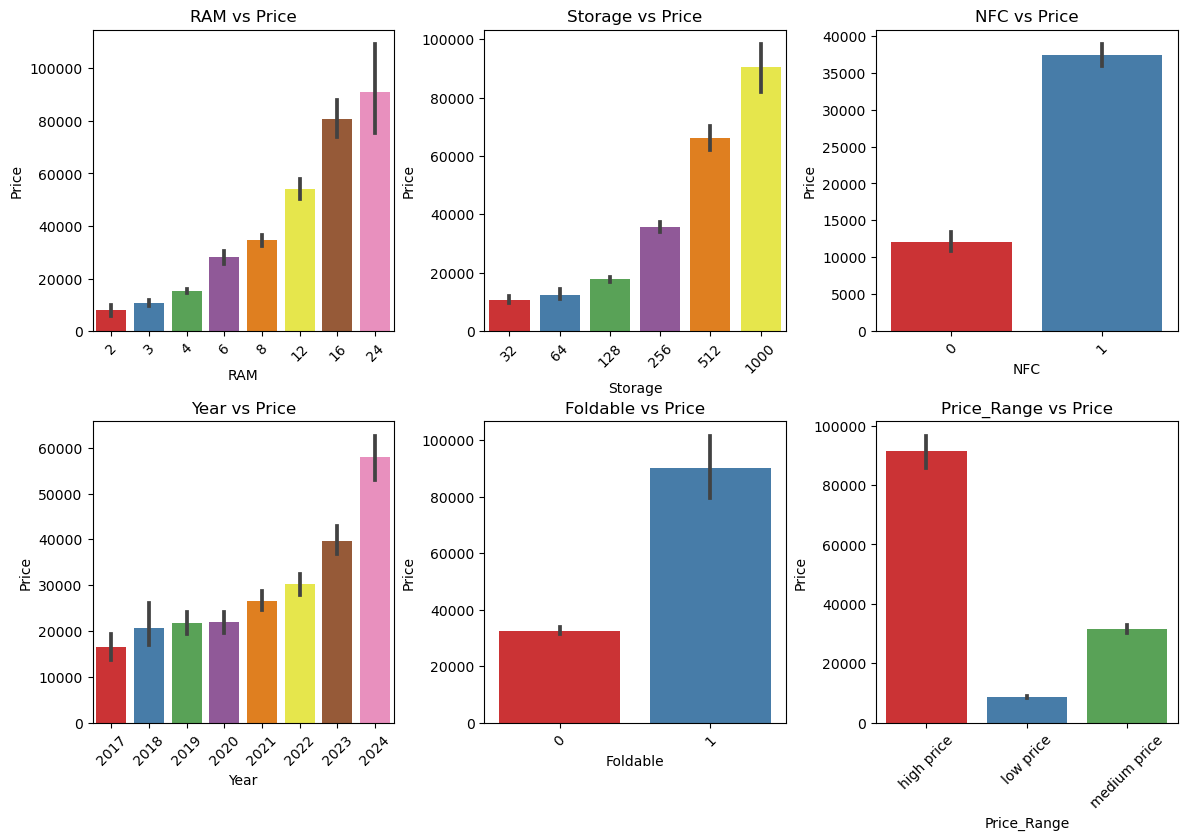

In [32]:
plt.subplots(2,3,figsize=(14, 9))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in ['RAM', 'Storage', 'NFC', 'Year', 'Foldable', 'Price_Range']:
    plt.subplot(2,3,k)
    sns.barplot(x = i, y = 'Price', data = phones_df, palette='Set1')
    plt.title(f'{i} vs Price')
    plt.xticks(rotation = 45)
    k += 1

plt.show()

#### Column : Weight, Display_Size, BATTERY, PPI_Density, Resolution_X, Resolution_Y, Dim_h, Dim_b, Dim_d

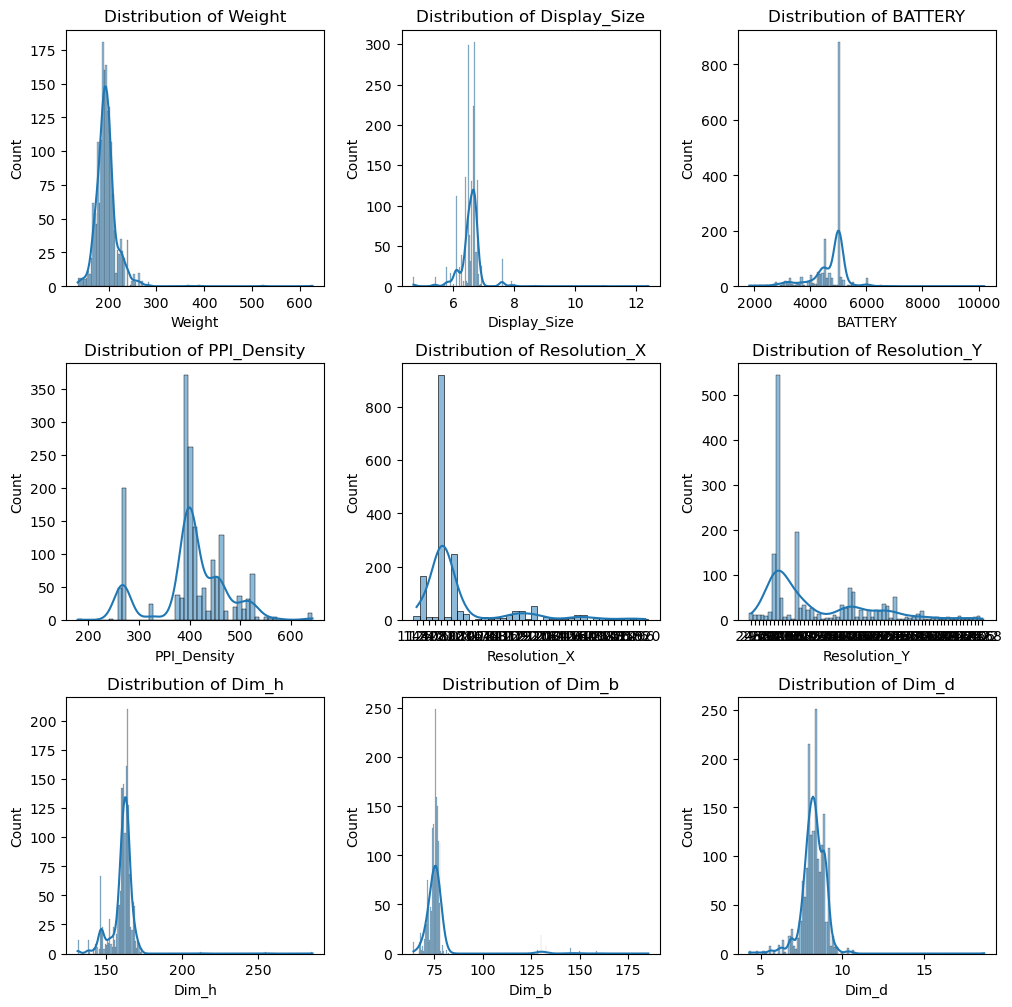

In [33]:
plt.subplots(3,3,figsize=(12, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

k = 1
for i in ['Weight', 'Display_Size', 'BATTERY', 'PPI_Density', 'Resolution_X', 'Resolution_Y', 'Dim_h', 'Dim_b', 'Dim_d']:
    plt.subplot(3,3,k)
    sns.histplot(x = i, data = phones_df, kde=True)
    plt.title(f'Distribution of {i}')
    k += 1

plt.show()

## Data Splitting

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(phones_df.drop(columns=['Price']), phones_df['Price'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((1372, 16), (1372,))

## Data Preprocessing

#### Analyzer

In [35]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

st_words = set(stopwords.words('english'))
ps = PorterStemmer()

def Analyzer(text):
    text = ' '.join([ps.stem(token) for token in word_tokenize(text) if token not in [',','(',')'] and token not in st_words])
    return text

#### Count Vectorizer (Bag of Words)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer=Analyzer)

#### Column Transformer

In [37]:
Storages = np.sort(phones_df['Storage'].unique())
RAMs = np.sort(phones_df['RAM'].unique())
NFCs = np.sort(phones_df['NFC'].unique())
Foldables = np.sort(phones_df['Foldable'].unique())
Years = np.sort(phones_df['Year'].unique())

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

ct = ColumnTransformer(transformers=[('scaler1', RobustScaler(), ['Weight','Display_Size','BATTERY','Resolution_X','Resolution_Y']),
                                     ('scaler2', StandardScaler(), ['PPI_Density','Dim_h','Dim_b','Dim_d']),
                                     ('encoder', OrdinalEncoder(categories=[Storages,RAMs,NFCs,Foldables,Years,['low price','medium price','high price']]),
                                      ['Storage','RAM','NFC','Foldable','Year','Price_Range'])],
                       remainder='drop', sparse_threshold=0)
ct

ColumnTransformer(sparse_threshold=0,
                  transformers=[('scaler1', RobustScaler(),
                                 ['Weight', 'Display_Size', 'BATTERY',
                                  'Resolution_X', 'Resolution_Y']),
                                ('scaler2', StandardScaler(),
                                 ['PPI_Density', 'Dim_h', 'Dim_b', 'Dim_d']),
                                ('encoder',
                                 OrdinalEncoder(categories=[array([  32,   64,  128,  256,  512, 1000], dtype=int64),
                                                            array([ 2,  3,  4,  6,  8, 12, 16, 24], dtype=int64),
                                                            array([0, 1], dtype=int64),
                                                            array([0, 1], dtype=int64),
                                                            array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=int64),
                                                            ['low price',
                                                             'medium price',
                                                             'high price']]),
                                 ['Storage', 'RAM', 'NFC', 'Foldable', 'Year',
                                  'Price_Range'])])

## Preprocessed Data

In [39]:
X_train_features = pd.concat([pd.DataFrame(cv.fit_transform(X_train['Features']).toarray()),
                              pd.DataFrame(ct.fit_transform(X_train))],axis = 1, ignore_index=True)
X_train_features.shape, y_train.shape

((1372, 61), (1372,))

In [40]:
X_test_features = pd.concat([pd.DataFrame(cv.transform(X_test['Features']).toarray()),
                              pd.DataFrame(ct.transform(X_test))],axis = 1, ignore_index=True)
X_test_features.shape, y_test.shape

((343, 61), (343,))

## Model Selection

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = {
    'Dt': DecisionTreeRegressor(),
    'Random': RandomForestRegressor(),
    'HGBT': HistGradientBoostingRegressor(),
    'GBT': GradientBoostingRegressor(),
    'Extra': ExtraTreesRegressor()
}

for i in models.keys():
    scores = cross_val_score(models[i], X_train_features, y_train, cv = 5)
    print(f'{i}: {scores}, {scores.mean()}')

Dt: [0.79654485 0.84581872 0.68516096 0.82732542 0.73851127], 0.7786722427137414
Random: [0.86852946 0.90051313 0.82991572 0.88154392 0.84695304], 0.8654910551543307
HGBT: [0.8757075  0.88793604 0.84396558 0.86458374 0.8545616 ], 0.865350889870492
GBT: [0.87915942 0.88929071 0.82929601 0.87680555 0.85523348], 0.8659570357787112
Extra: [0.87219025 0.88992621 0.84551248 0.87492174 0.85231806], 0.8669737499994221


## Model Building

In [64]:
model = RandomForestRegressor()
model.fit(X_train_features, y_train)

RandomForestRegressor()

## Model Evaluation

In [65]:
score = model.score(X_test_features, y_test)
print('Model Score: ', score)

Model Score:  0.8937631575917556
